In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import matplotlib.cm as cmx
import matplotlib.colorbar as cb
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os

from astropy import units as u
from astropy.constants import G
from astropy.io import ascii, fits
from astropy.table import Table
from astropy.timeseries import LombScargle
import astropy.time
import dateutil.parser

from matplotlib import gridspec
import scipy.optimize as sciop
import json
from scipy.stats import mode

from lightkurve import search_targetpixelfile

import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

from scipy.stats import binned_statistic

import corner

%matplotlib inline

In [2]:
def draw_solar_rot(ax, center, radius, facecolor='k', edgecolor='None', theta1=135, theta2=30):
    
    # Add the ring
    rwidth = radius/6
    ring = patches.Wedge(center, radius, theta1, theta2, width=rwidth)
    # Triangle edges
    offset = radius/3
    xcent  = center[0] + radius - (rwidth/2)
    left   = [xcent - offset - radius/10, center[1]+radius/5]
    right  = [xcent + offset, center[1]+radius/3]

    top = [xcent-7, center[1]+radius]
    arrow  = plt.Polygon([left, right, top, left])
    p = PatchCollection(
        [ring, arrow], 
        edgecolor = edgecolor, 
        facecolor = facecolor
    )
    ax.add_collection(p)

SOHO_EIT_195_19960628T150357_L1.fits
(1024, 1024)
FULL SUN 195
signal is 38415392.0
sqrt(signal) is 6198.01513671875
noise is 30525.43437856372
SNR is 1258.471592036605


/var/folders/f8/fqd5scnj31n0br62dg8rnm2w0000gn/T/ipykernel_1358/1040319678.py:63: RuntimeWarning: invalid value encountered in log10
  cs = ax0.imshow(np.log10(data),cmap='Greys_r',interpolation='None',origin="lower")


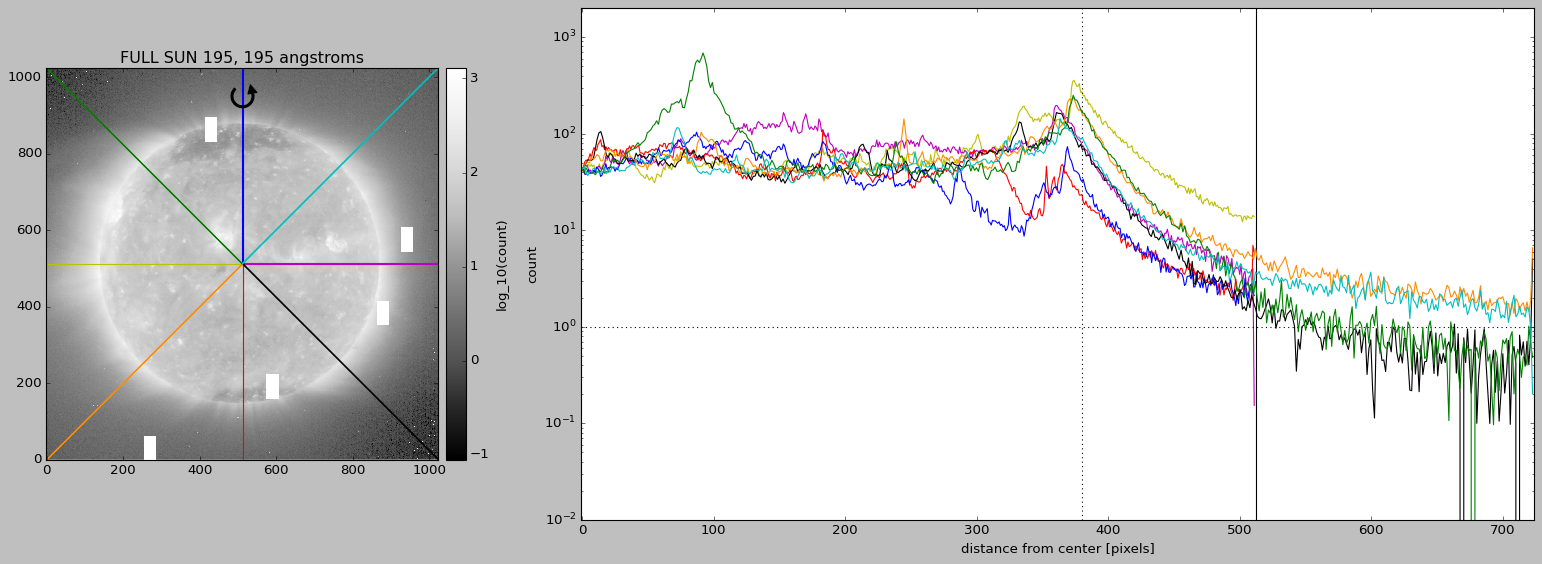

SOHO_EIT_171_19960628T081205_L1.fits
(1024, 1024)
FULL SUN 171/284/195/304
signal is 81547200.0
sqrt(signal) is 9030.3486328125
noise is 31223.932359650025
SNR is 2611.6889782076773


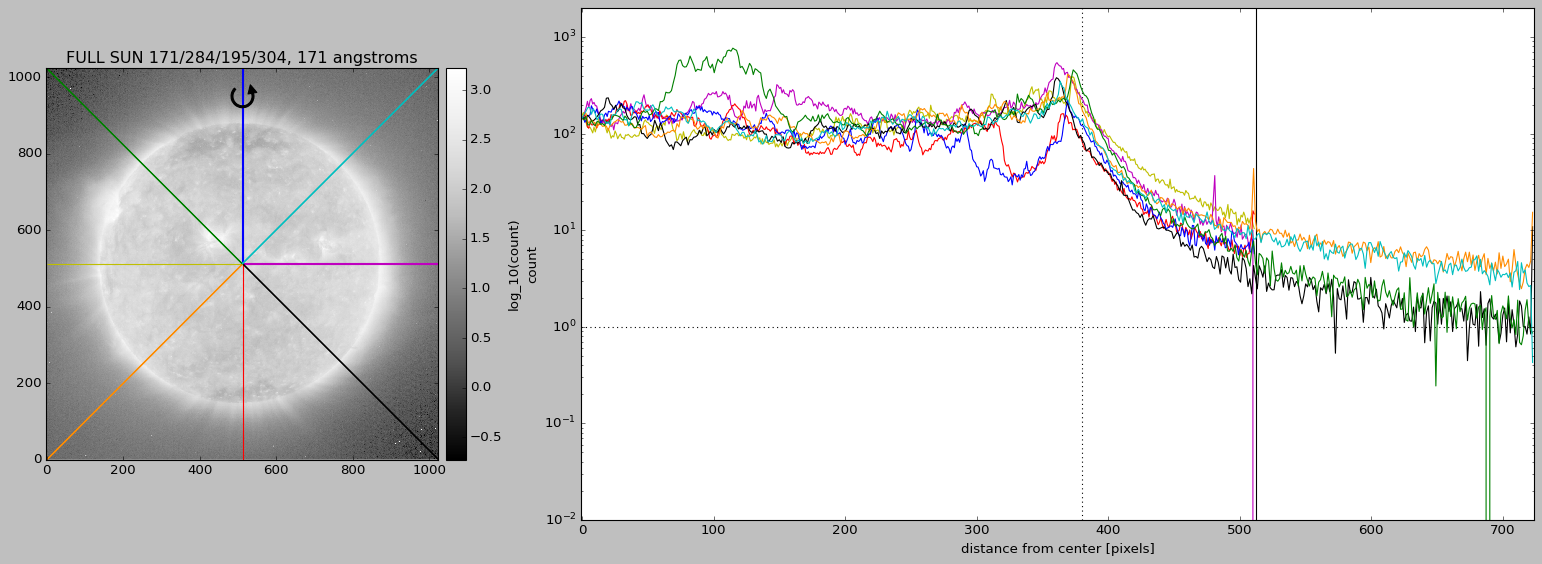

SOHO_EIT_304_19960628T002948_L1.fits
(1024, 1024)
FULL SUN 171/284/195/304
signal is 29174204.0
sqrt(signal) is 5401.31494140625
noise is 30373.688547820464
SNR is 960.5090917445871


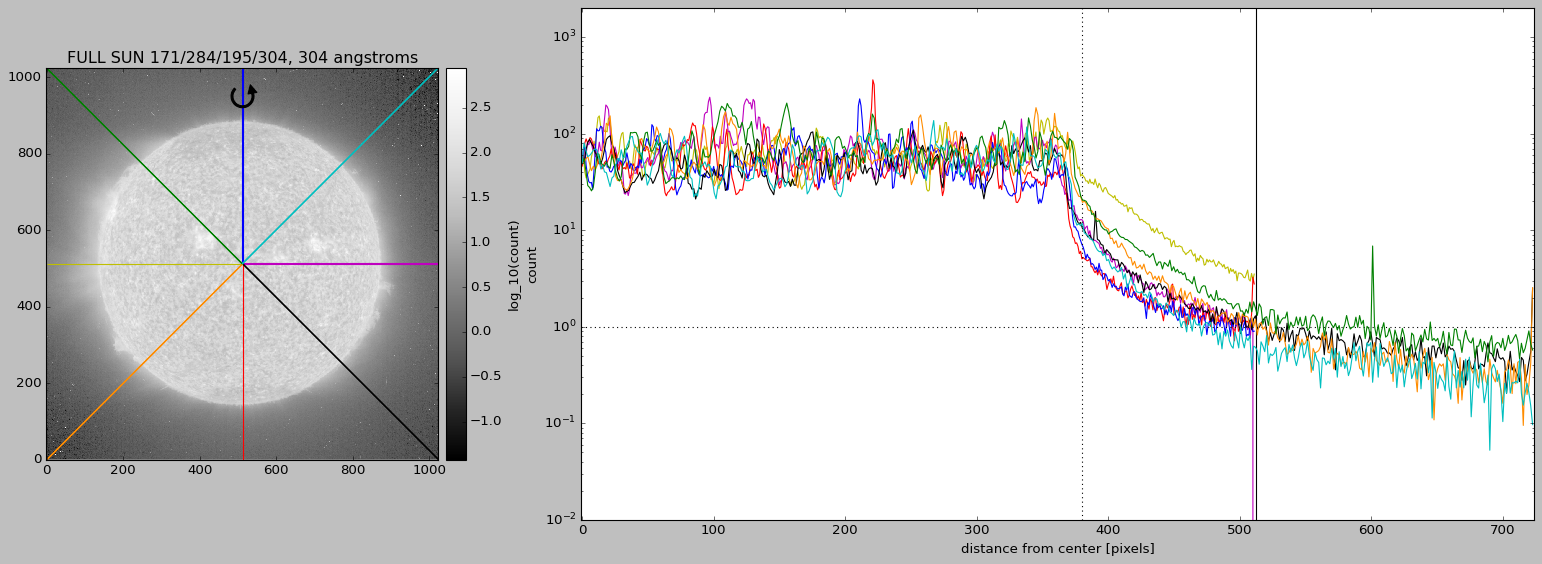

SOHO_EIT_171_19960628T070007_L1.fits
(1024, 1024)
FULL SUN 171/284/195/304
signal is 80935992.0
sqrt(signal) is 8996.443359375
noise is 31214.143332790667
SNR is 2592.9269029458255


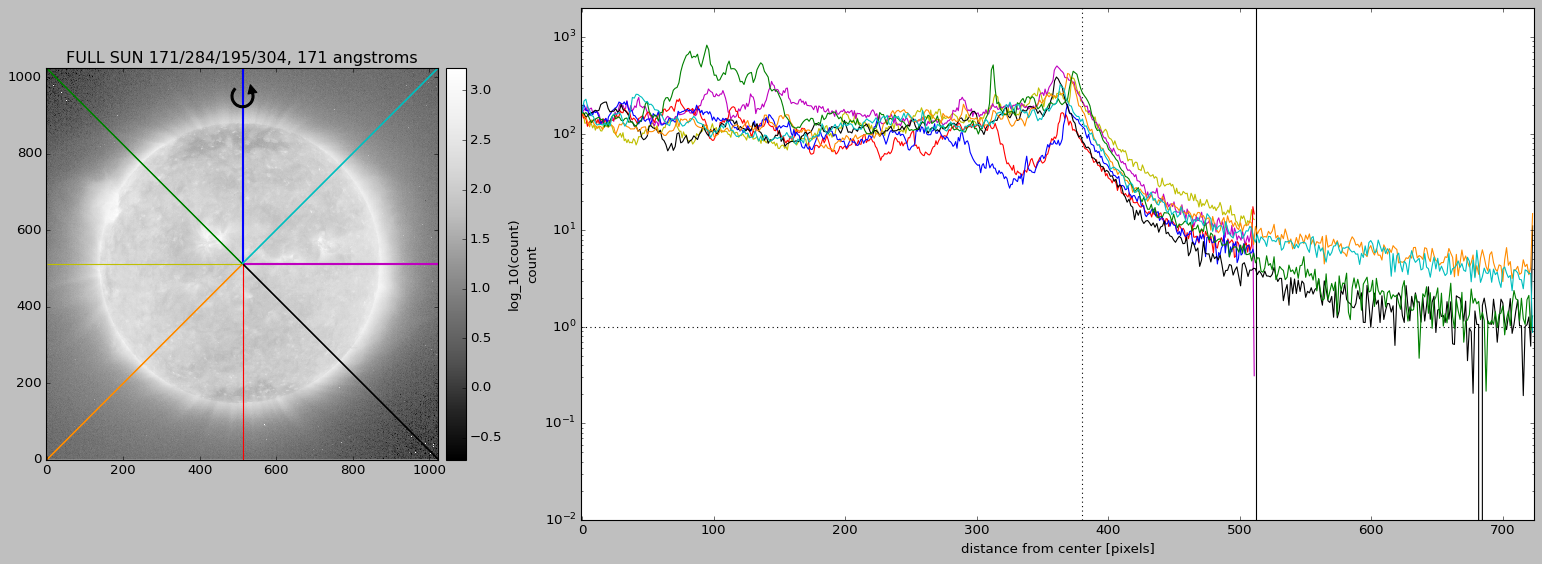

SOHO_EIT_284_19960628T071835_L1.fits
(1024, 1024)
FULL SUN 171/284/195/304
signal is 2783528.0
sqrt(signal) is 1668.390869140625
noise is 29936.10328683411
SNR is 92.98230879715715


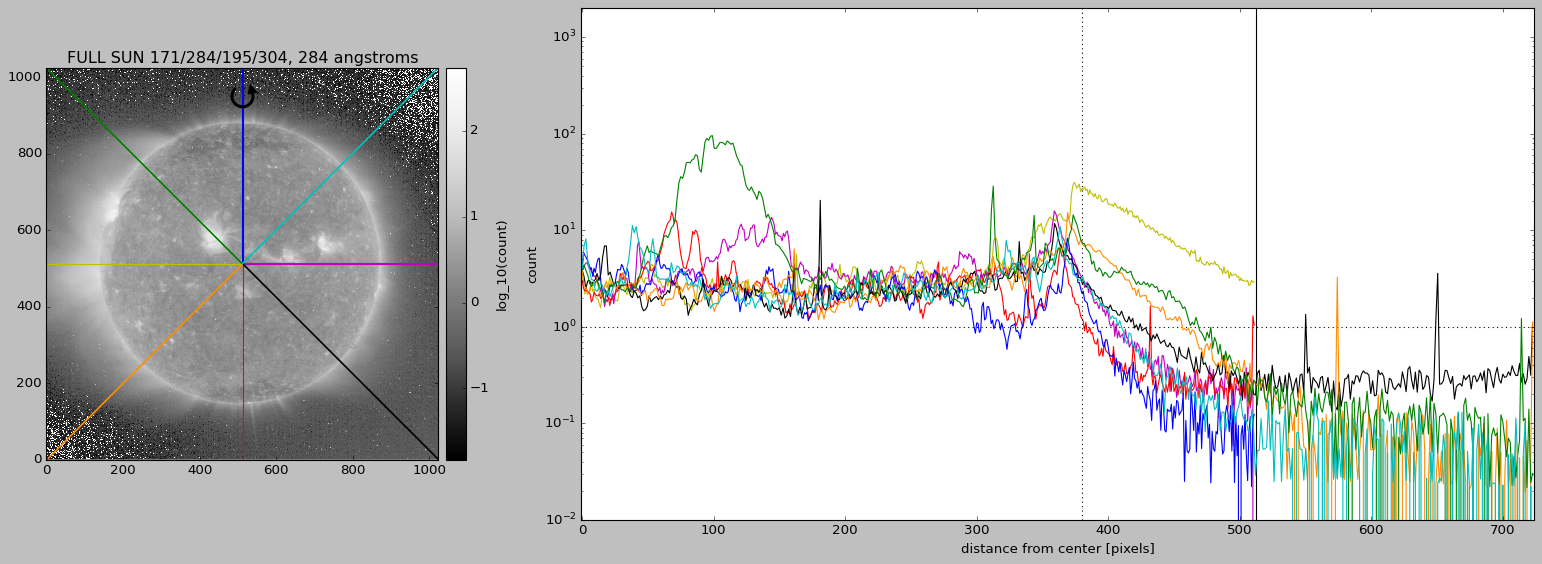

SOHO_EIT_195_19960628T012538_L1.fits
(1024, 1024)
FULL SUN 171/284/195/304
signal is 39299540.0
sqrt(signal) is 6268.9345703125
noise is 30539.913097453307
SNR is 1286.8255346567162


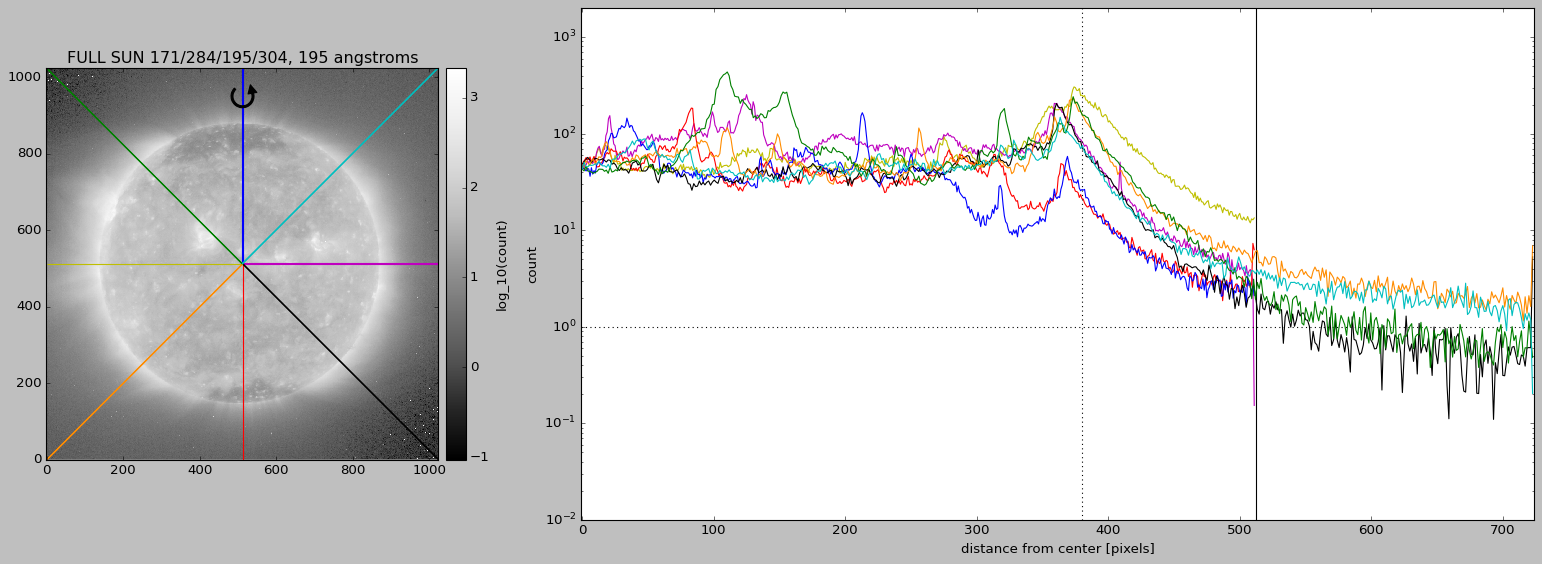

SOHO_EIT_284_19960628T010923_L1.fits
(1024, 1024)
FULL SUN 171/284/195/304
signal is 2787954.0
sqrt(signal) is 1669.716796875
noise is 29936.177210859772
SNR is 93.12992705657254


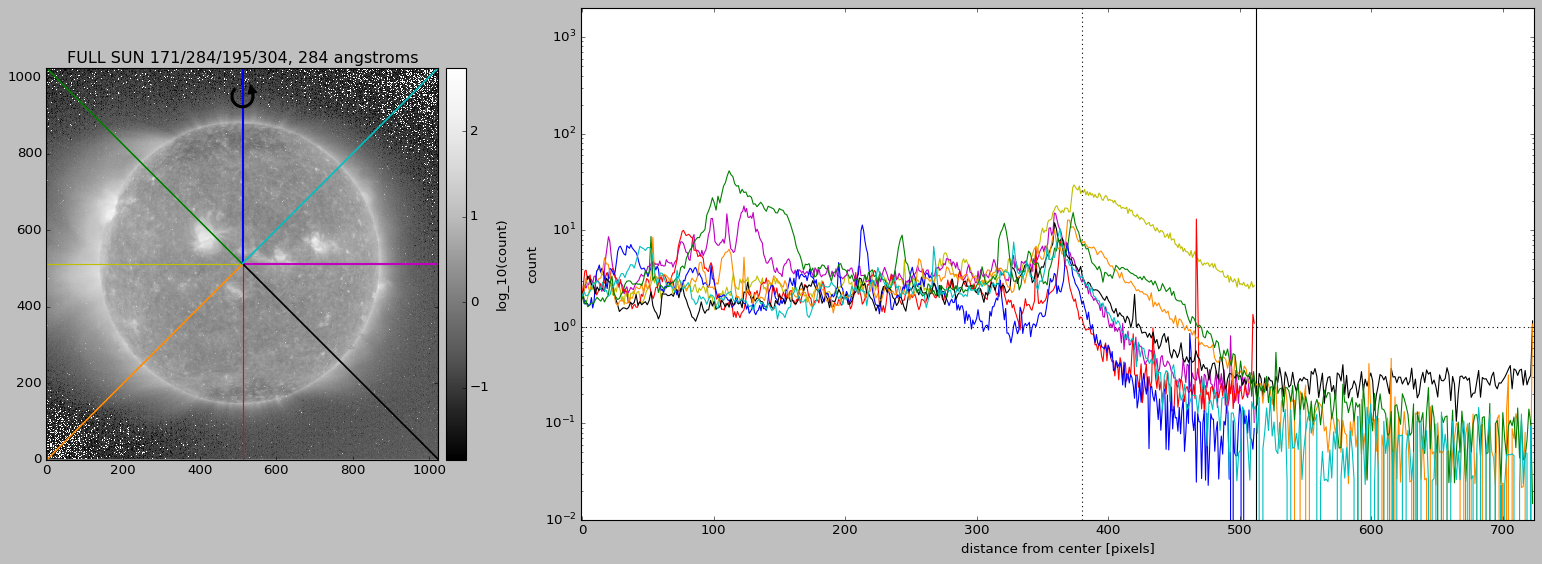

SOHO_EIT_171_19960628T031751_L1.fits
(1024, 1024)
FULL SUN 171/284/195/304
signal is 81317424.0
sqrt(signal) is 9017.6171875
noise is 31220.252657529854
SNR is 2604.636960885948


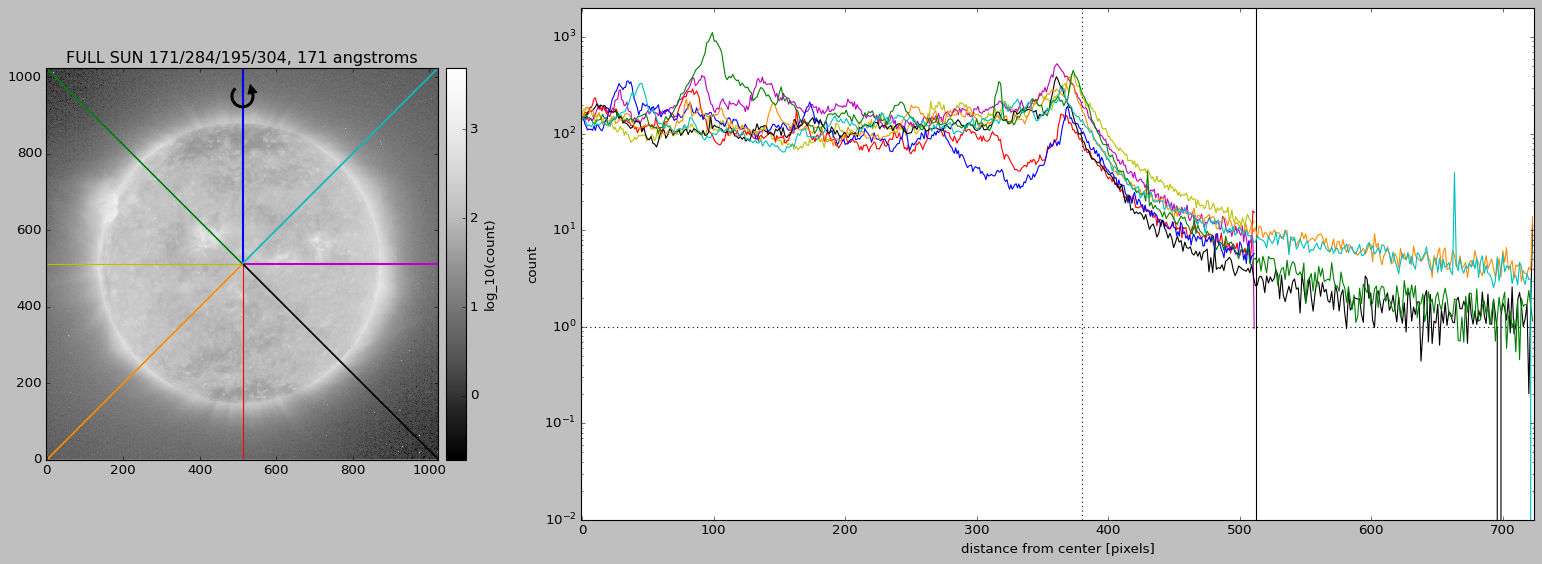

SOHO_EIT_171_19960628T174906_L1.fits
(1024, 1024)
FULL SUN 171
signal is 79004328.0
sqrt(signal) is 8888.4375
noise is 31183.185853918134
SNR is 2533.555370836915


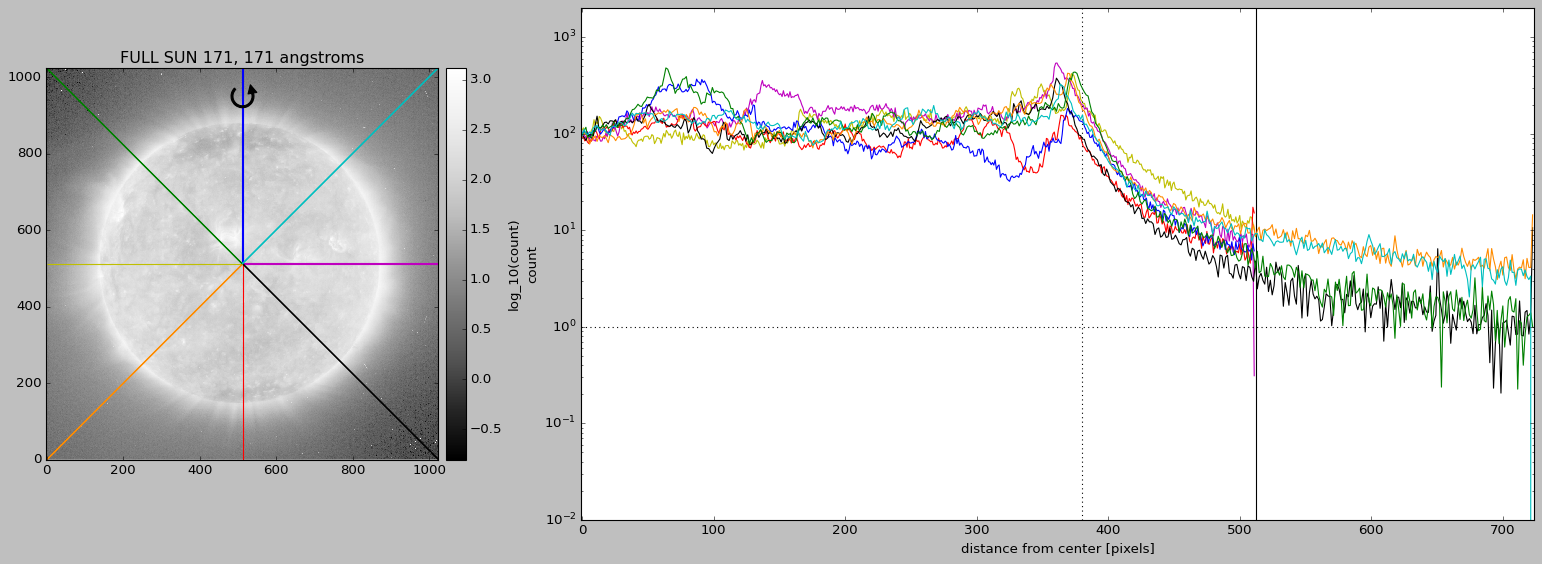

SOHO_EIT_304_19960628T090514_L1.fits
(1024, 1024)
FULL SUN 171/284/195/304
signal is 29271760.0
sqrt(signal) is 5410.33837890625
noise is 30375.294434786967
SNR is 963.6700003960075


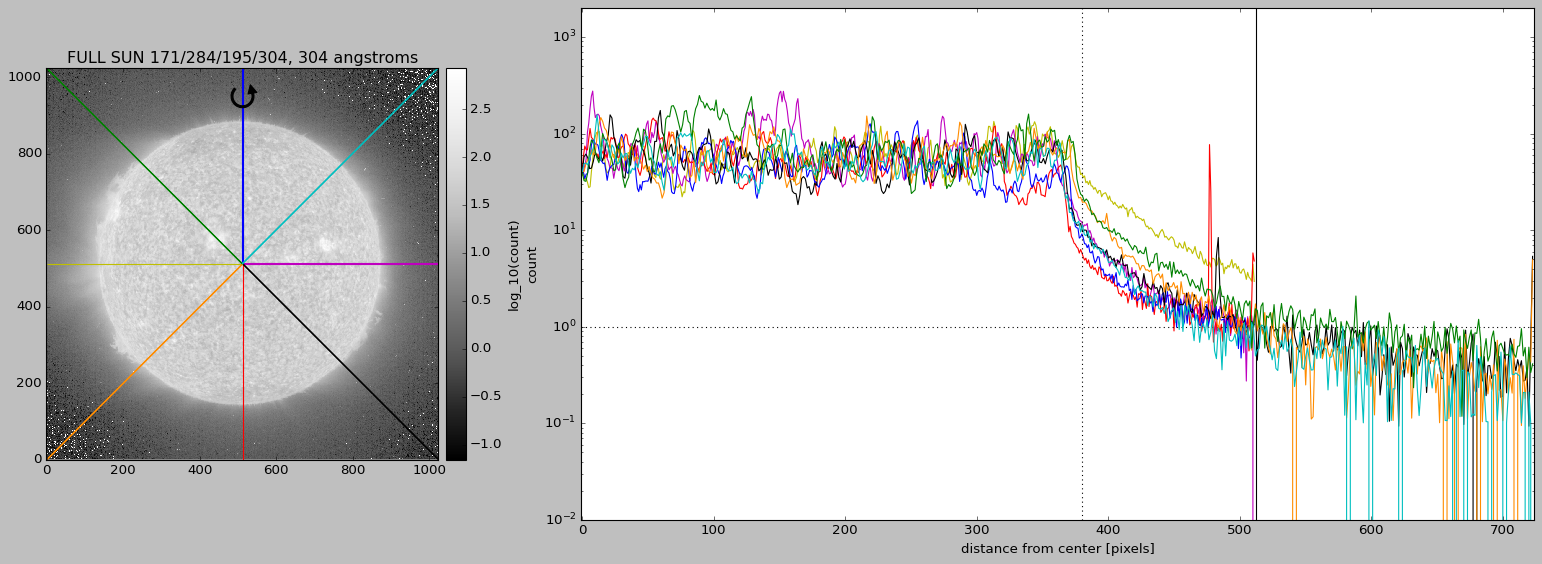

SOHO_EIT_304_19960628T101740_L1.fits
(1024, 1024)
FULL SUN 171/284/195/304
signal is 29287134.0
sqrt(signal) is 5411.7587890625
noise is 30375.547501238558
SNR is 964.1681026097002


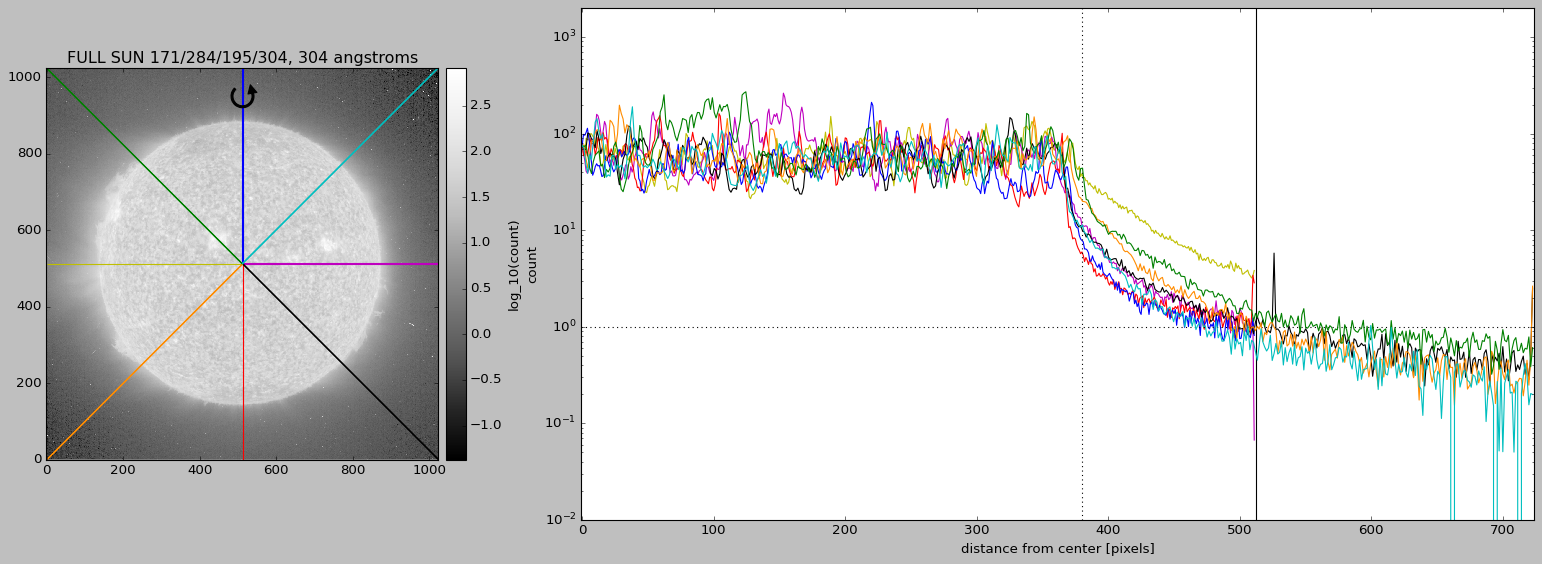

SOHO_EIT_195_19960628T023945_L1.fits
(1024, 1024)
FULL SUN 171/284/195/304
signal is 39218108.0
sqrt(signal) is 6262.43603515625
noise is 30538.579862200535
SNR is 1284.2151854134727


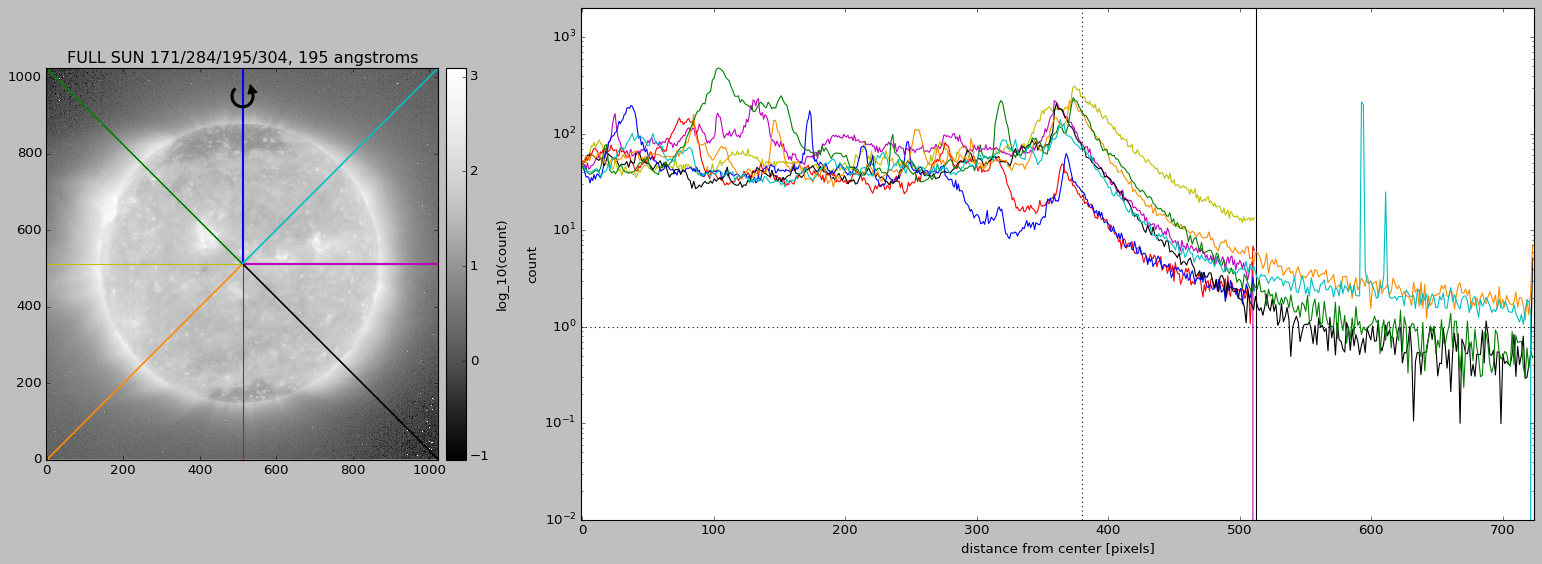

SOHO_EIT_304_19960628T113154_L1.fits
(1024, 1024)
FULL SUN 171/284/195/304
signal is 29457870.0
sqrt(signal) is 5427.51025390625
noise is 30378.35778971602
SNR is 969.6992248202556


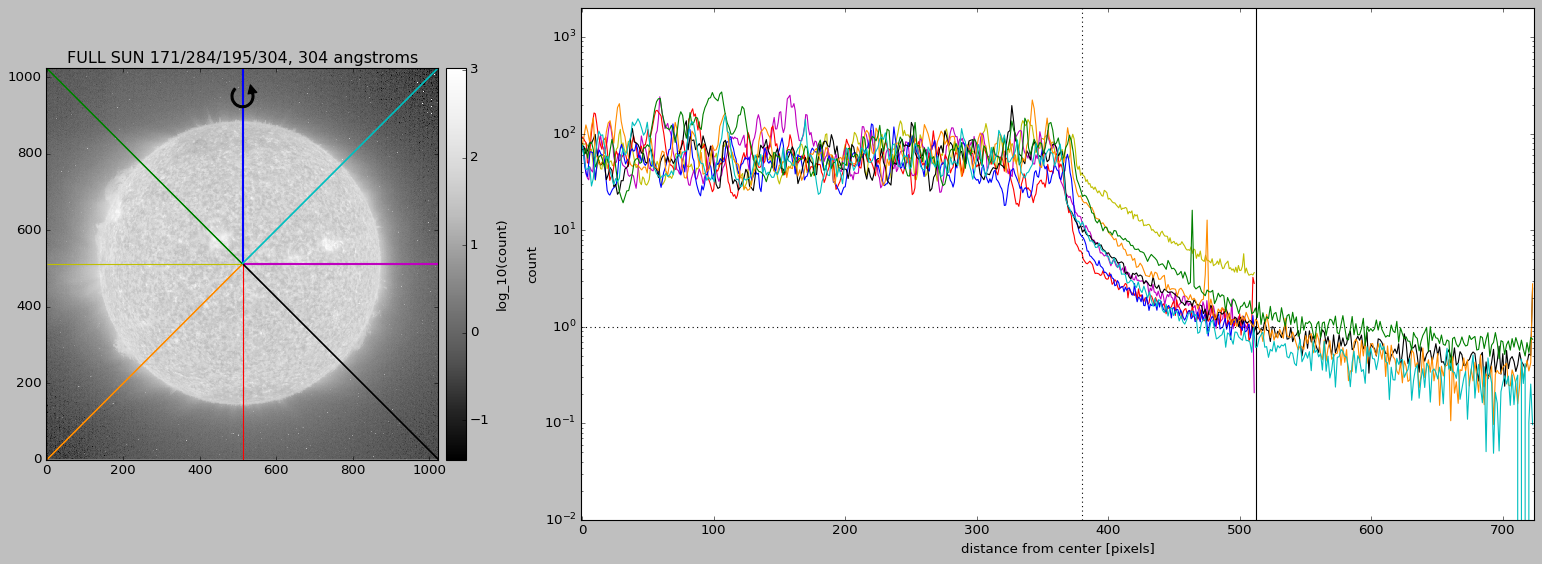

SOHO_EIT_171_19960628T005056_L1.fits
(1024, 1024)
FULL SUN 171/284/195/304
signal is 81393296.0
sqrt(signal) is 9021.8232421875
noise is 31221.46774256457
SNR is 2606.96571574166


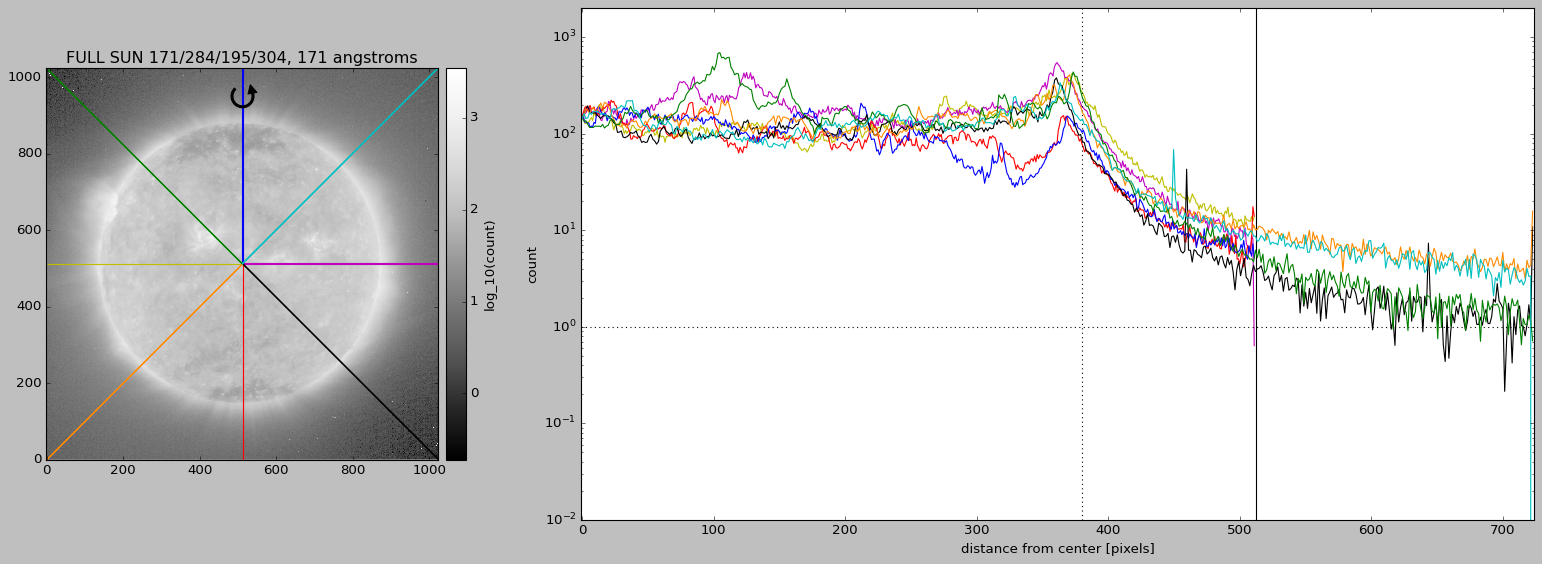

SOHO_EIT_171_19960628T092420_L1.fits
(1024, 1024)
FULL SUN 171/284/195/304
signal is 79951640.0
sqrt(signal) is 8941.568359375
noise is 31198.371624172953
SNR is 2562.6863146297133


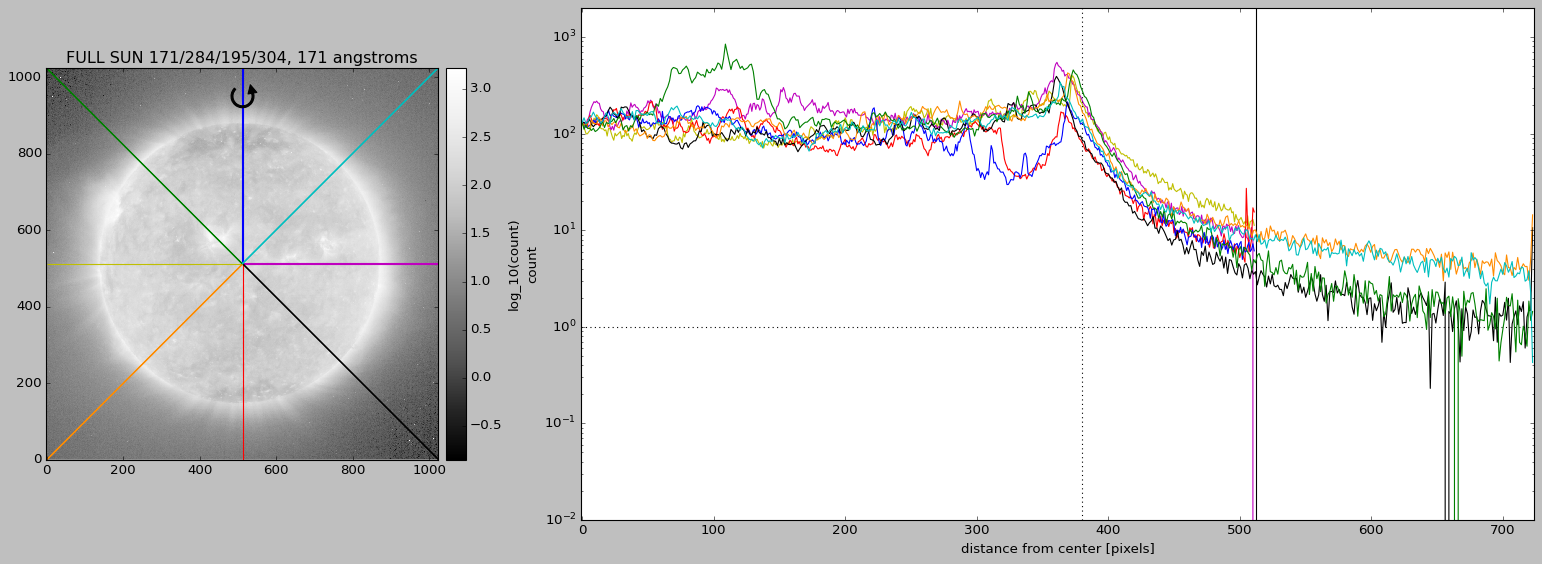

SOHO_EIT_171_19960628T115303_L1.fits
(1024, 1024)
FULL SUN 171
signal is 42440348.0
sqrt(signal) is 6514.62548828125
noise is 30591.291244404838
SNR is 1387.3343122697497


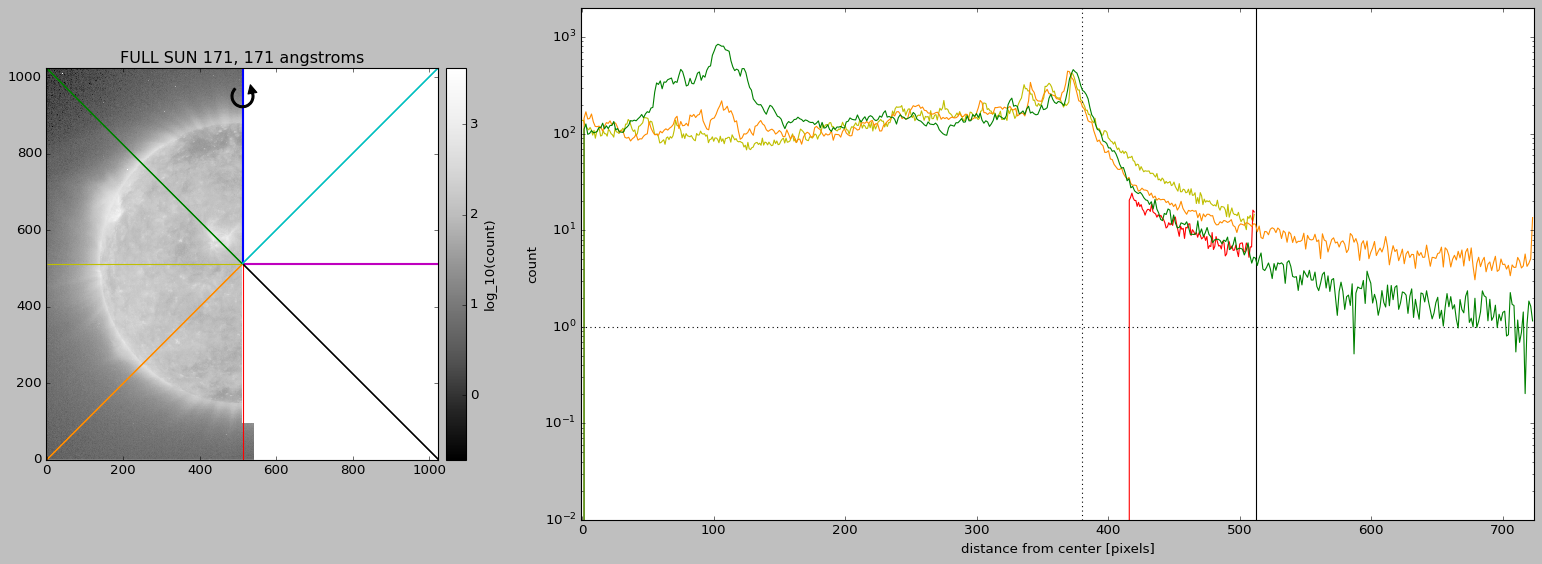

SOHO_EIT_195_19960628T001111_L1.fits
(1024, 1024)
FULL SUN 171/284/195/304
signal is 42446404.0
sqrt(signal) is 6515.09033203125
noise is 30591.39022666345
SNR is 1387.5277875735023


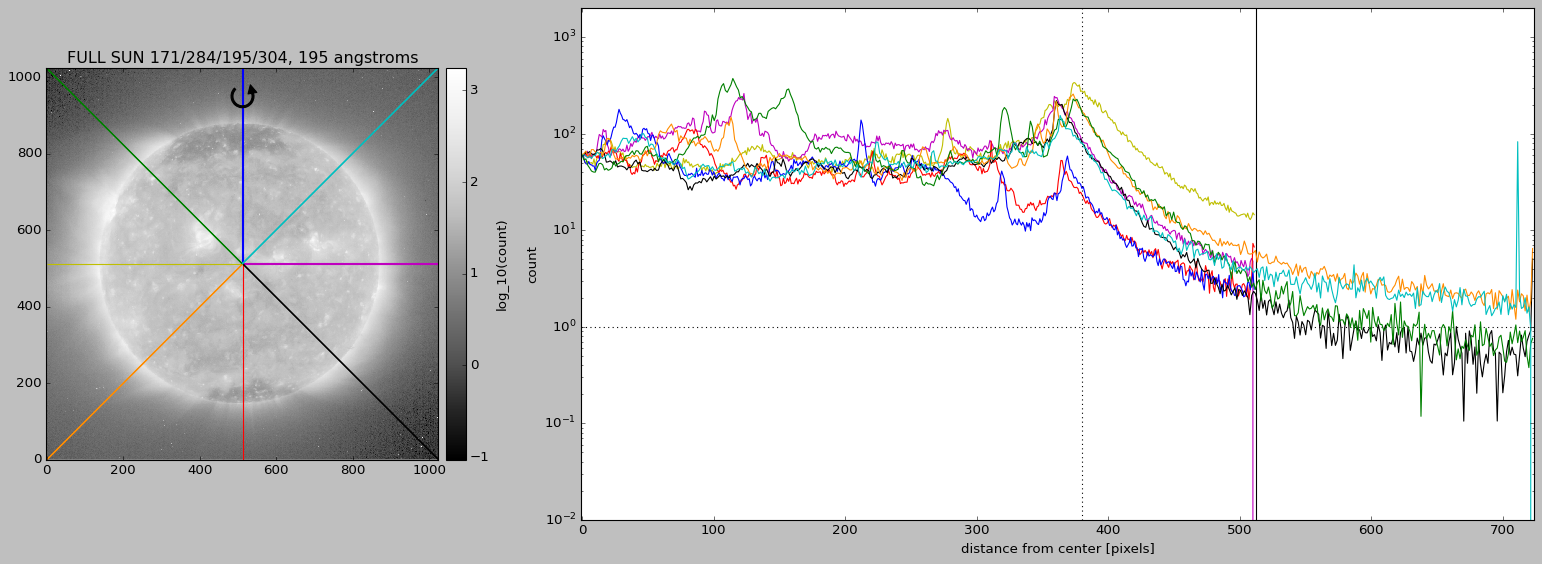

SOHO_EIT_284_19960628T060425_L1.fits
(1024, 1024)
FULL SUN 171/284/195/304
signal is 2769931.75
sqrt(signal) is 1664.3111572265625
noise is 29935.876198133905
SNR is 92.52883502279674


In [ ]:
testFITS = os.scandir("./EIT/1996/06/28/")
#testFITS = os.scandir("./EIT/1996/engineering/")
#print(testFITS)
#print(type(testFITS))

for f in testFITS:
    print(f.name)
    #print(f.path)

    hdul = fits.open(f.path)
    #print(type(hdul))
    #hdul.info()
    header = hdul[0].header
    data = hdul[0].data
    print(np.shape(data))

    print(header['SCI_OBJ'])

    if "CAL" in f.name:
        fig = plt.figure(figsize=(8,8))
        gs = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)
        ax0 = fig.add_subplot(gs[0, 0])
        
        cs = ax0.imshow(np.log10(data),cmap='Greys_r',interpolation='None',origin="lower")
        ax0.set_title('CAL')
    
        divider = make_axes_locatable(ax0)
        cax = divider.append_axes("right", size="5%", pad="2%")
        fig.add_axes(cax)
        fig.colorbar(cs, cax=cax,label="log_10(count)")
        plt.show()

    #elif header['SCI_OBJ'] == 'DARK IMAGE':
    #    print("median dark image pixel value is {0}".format(np.median(data)))
    else:
        #print(type(header))
        #print(type(data[0][0]))
        #print(data[510:514,510:514])
        #print(repr(header)) 
        #print(header['DSUN_OBS'])
        #print(header['SCI_OBJ'])
        #print(header['OBS_PROG'])
        #print(header['CMP_NO'])
        #print(np.min(data))
    
        #data[data <= 0.] = 0.01
        
        #print(len(np.ravel(data[data <= 0]))/(1024**2))
        #print(np.median(data[0]))
        #print(np.median(data[:,0]))
        signal = np.sum(data)
        noise = np.sqrt(np.sum(data) + 1024*1024*852.)
        print("signal is {0}".format(signal))
        print("sqrt(signal) is {0}".format(np.sqrt(signal)))
        print("noise is {0}".format(noise))
        print("SNR is {0}".format(signal/noise))
        
        fig = plt.figure(figsize=(24,8))
        gs = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
        ax0 = fig.add_subplot(gs[0, 0])
        ax1 = fig.add_subplot(gs[0, 1:])
        
        cs = ax0.imshow(np.log10(data),cmap='Greys_r',interpolation='None',origin="lower")
        ax0.set_title('{0}, {1} angstroms'.format(header['SCI_OBJ'],header['WAVELNTH']))
    
        divider = make_axes_locatable(ax0)
        cax = divider.append_axes("right", size="5%", pad="2%")
        fig.add_axes(cax)
        fig.colorbar(cs, cax=cax,label="log_10(count)")

        rect0 = patches.Rectangle((512, 512), width=512, height = 1, linewidth=1, edgecolor='y', facecolor='none',angle=180.,rotation_point='xy')
        rect1 = patches.Rectangle((512, 512), width=512, height = 1, linewidth=1, edgecolor='m', facecolor='none')
        rect2 = patches.Rectangle((512, 512), width=512, height = 1, linewidth=1, edgecolor='r', facecolor='none',angle=270.,rotation_point='xy')
        rect3 = patches.Rectangle((512, 512), width=512, height = 1, linewidth=1, edgecolor='b', facecolor='none',angle=90.,rotation_point='xy')
        
        rect4 = patches.Rectangle((512, 512), width=512*np.sqrt(2), height = 1, linewidth=1, edgecolor='k', facecolor='none',angle=270+45.,rotation_point='xy')
        rect5 = patches.Rectangle((512, 512), width=512*np.sqrt(2), height = 1, linewidth=1, edgecolor='darkorange', facecolor='none',angle=180+45.,rotation_point='xy')
        rect6 = patches.Rectangle((512, 512), width=512*np.sqrt(2), height = 1, linewidth=1, edgecolor='g', facecolor='none',angle=90+45.,rotation_point='xy')
        rect7 = patches.Rectangle((512, 512), width=512*np.sqrt(2), height = 1, linewidth=1, edgecolor='c', facecolor='none',angle=45.,rotation_point='xy')
        
        for r in [rect0,rect1,rect2,rect3,rect4,rect5,rect6,rect7]:
            ax0.add_patch(r)
    
        draw_solar_rot(ax=ax0, center=(512,950), radius=30, facecolor='k', edgecolor='k', theta1=135, theta2=30) 
        
        #axes[1].hist(np.ravel(data), color = 'k', alpha=0.5,range=(0,1500),bins=50,log=True)
        #axes[1].set_ylim(1.,1.e6)
        #axes[1].set_xlim(0.,1500)
        #axes[1].set_xlabel("counts/pixel")
    
    
        #data = np.log10(data)
    
        try:
            ax1.plot(np.arange(512),data[512,0:512][::-1],'y-')
            ax1.plot(np.arange(512),data[512,512:],'m-')
            ax1.plot(np.arange(512),data[0:512,512][::-1],'r-')
            ax1.plot(np.arange(512),data[512:,512],'b-')
            ax1.axvline(380,color='k',ls=':')
            ax1.axvline(512,color='k',ls='-')
            ax1.axhline(1,color='k',ls=':')
        
            ur = np.zeros(512)
            lr = np.zeros(512)
            ul = np.zeros(512)
            ll = np.zeros(512)
            for i in range(512):
                ur[i] = data[512-i,512+i]
                lr[i] = data[512+i,512+i]
                ul[i] = data[512-i,512-i]
                ll[i] = data[512+i,512-i]
        
            ax1.plot(np.arange(512)*np.sqrt(2),ur,'k-')
            ax1.plot(np.arange(512)*np.sqrt(2),ul,color='darkorange',ls='-')
            ax1.plot(np.arange(512)*np.sqrt(2),ll,'g-')
            ax1.plot(np.arange(512)*np.sqrt(2),lr,'c-')
            
            ax1.set_ylim(1.e-2,2.e3)
            ax1.set_yscale("log")
            #ax1.set_xscale("log")
            ax1.set_xlim(-1,512*np.sqrt(2))
            ax1.set_xlabel("distance from center [pixels]")
            ax1.set_ylabel("count")
        
            #ax1.plot(np.arange(200)+380, np.exp(41*np.exp(-np.linspace(2,3.3,200))), 'k-',lw=2)
            #ax1.plot(np.arange(200)+380, np.exp(38*np.exp(-np.linspace(2,4.1,200))), 'k-',lw=2)

        except IndexError:
            pass
        
        plt.subplots_adjust(wspace=0.275)
        plt.show()

    
    hdul.close()